In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [208]:
df = pd.read_csv('2021-23 copy.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3827 non-null   int64  
 1   movement_type_id              3827 non-null   int64  
 2   parent_movement_id            0 non-null      float64
 3   agency_id                     3827 non-null   int64  
 4   made_by_user_id               3827 non-null   int64  
 5   subscription_id               0 non-null      float64
 6   course_activation_code_id     0 non-null      float64
 7   electronic_payment_id         596 non-null    float64
 8   agency_plan_log_id            0 non-null      float64
 9   live_course_event_session_id  0 non-null      float64
 10  two_factor_auth_log_id        0 non-null      float64
 11  value                         3827 non-null   float64
 12  note                          3827 non-null   object 
 13  ign

In [210]:
monetary = df.groupby(['agency_id'])['value'].sum().reset_index()


In [211]:
frequency = df.groupby('agency_id')['created_at'].count().reset_index()

In [212]:
import datetime as dt

In [213]:
df['created_at'] = pd.to_datetime(df['created_at'],format='%Y-%m-%d %H:%M')

In [214]:
df['Diff'] = max(df['created_at'])- df['created_at']
recency = df.groupby('agency_id')['Diff'].min()

In [215]:
recency = recency.reset_index()

In [216]:
recency['Diff'] = recency['Diff'].dt.days


In [217]:
rfm = pd.merge(recency, frequency, on='agency_id',how='inner')

In [218]:
rfm = pd.merge(rfm,monetary, on ='agency_id',how='inner')

In [219]:
rfm.columns = ['agency_id','Recency','Frequency','Monetary']

<Axes: >

<IPython.core.display.Javascript object>


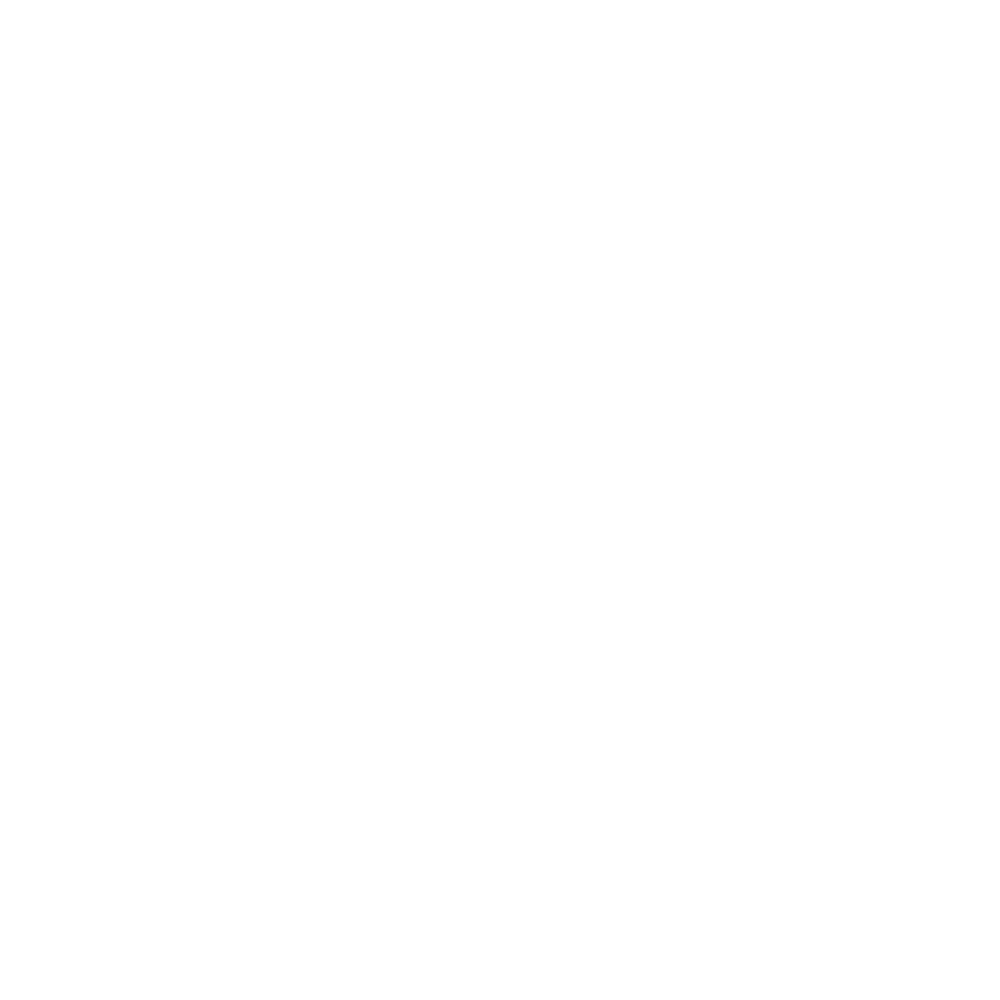

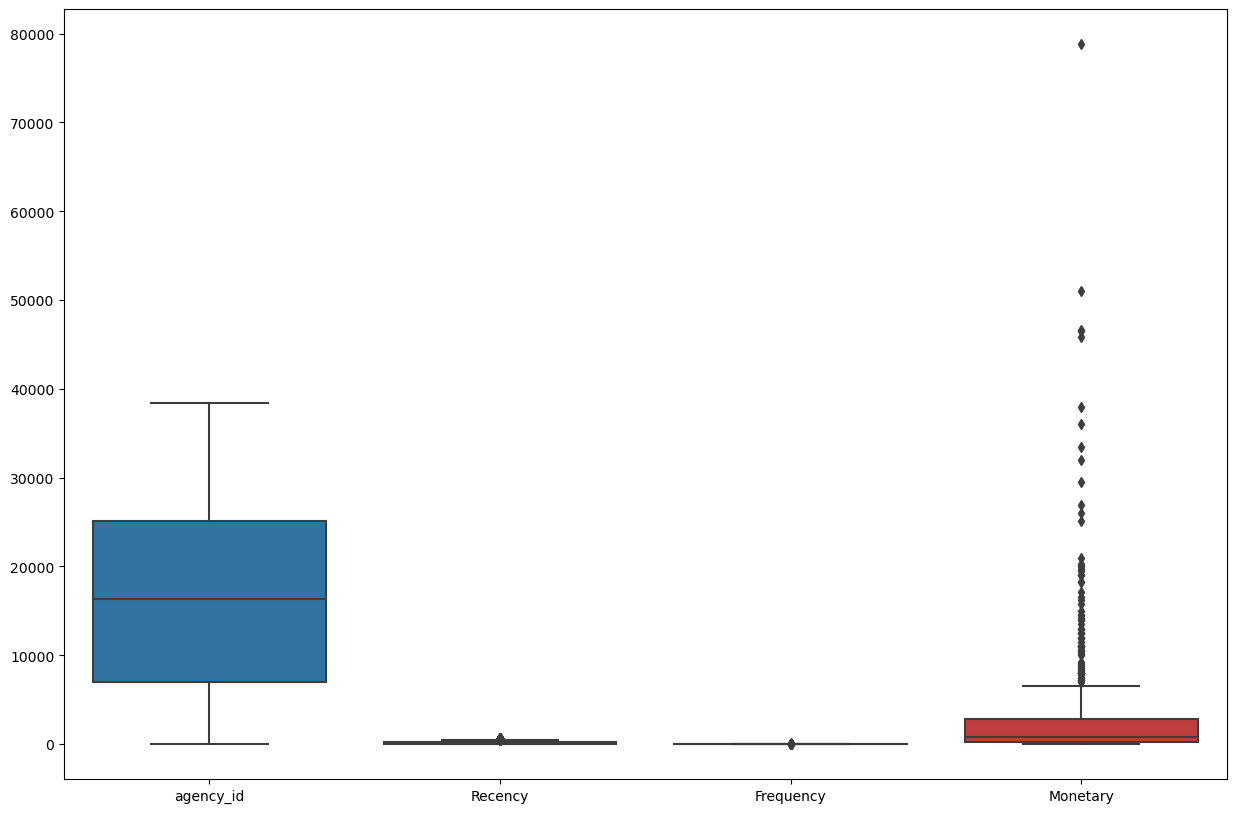

In [220]:
plt.figure(figsize=(15,10))
sns.boxplot(rfm)

In [221]:
scaler = StandardScaler()

In [222]:
rfm_normalized = rfm[['Monetary','Frequency','Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,100.00,1,24
1,46500.00,19,20
2,132.00,7,629
3,3819.68,3,313
4,8318.20,17,21
...,...,...,...
691,250.00,1,10
692,500.00,1,13
693,122.95,1,11
694,14189.60,2,6


In [223]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized = rfm_normalized.rename(columns={0: "Monetary", 1: "Frequency", 2: "Recency"})

<Axes: >

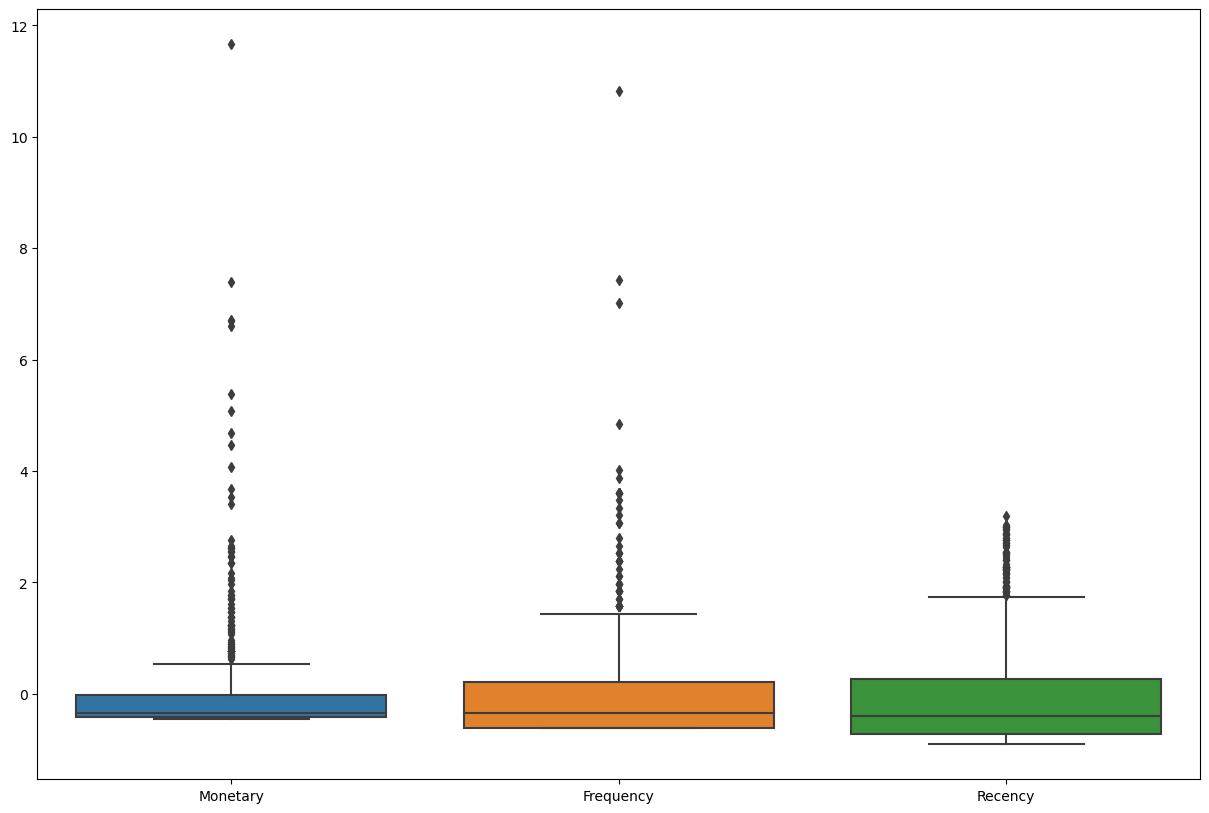

In [224]:
plt.figure(figsize=(15,10))
sns.boxplot(rfm_normalized)

In [225]:
kmeans = KMeans(n_clusters=4, max_iter=50)

In [226]:
kmeans.fit(rfm_normalized)

/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

In [227]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=500)
    kmeans.fit(rfm_normalized)
                    
    ssd.append(kmeans.inertia_)

/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

In [228]:
for num_clusters in range_n_clusters:
    
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(rfm_normalized)
        
        cluster_labels = kmeans.labels_
        
        silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
        


/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the silhouette score is 0.6053822279772371
For n_clusters=3, the silhouette score is 0.5321601340754449


/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the silhouette score is 0.5173755950994807
For n_clusters=5, the silhouette score is 0.4646264943824217


/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.4117981895986787
For n_clusters=7, the silhouette score is 0.41509917294484727


/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4086816975228838


In [229]:
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(rfm_normalized)

/Users/silviapalanca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=6)

In [230]:
rfm_normalized.loc[:,'agency_id'] = rfm['agency_id']

In [231]:
rfm_normalized['cluster'] = kmeans.labels_

<Axes: xlabel='cluster', ylabel='Monetary'>

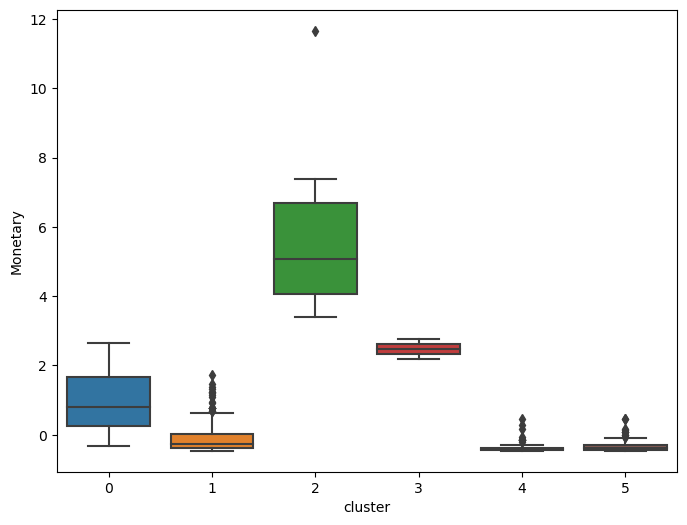

In [232]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster',y='Monetary',data=rfm_normalized)

<Axes: xlabel='cluster', ylabel='Frequency'>

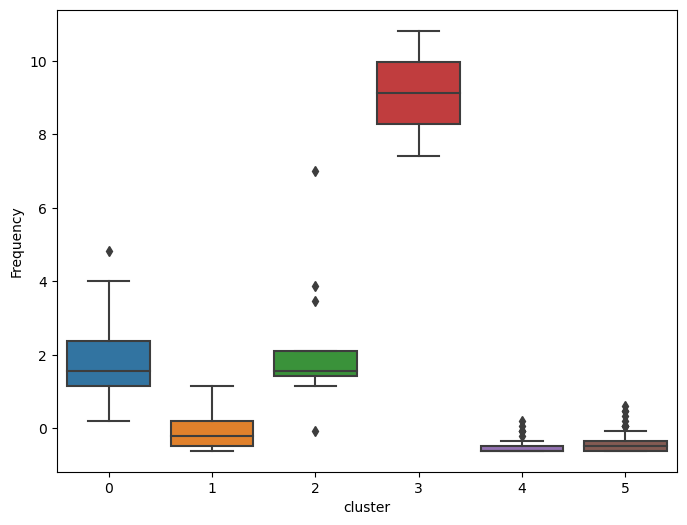

In [233]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster',y='Frequency',data=rfm_normalized)

<Axes: xlabel='cluster', ylabel='Recency'>

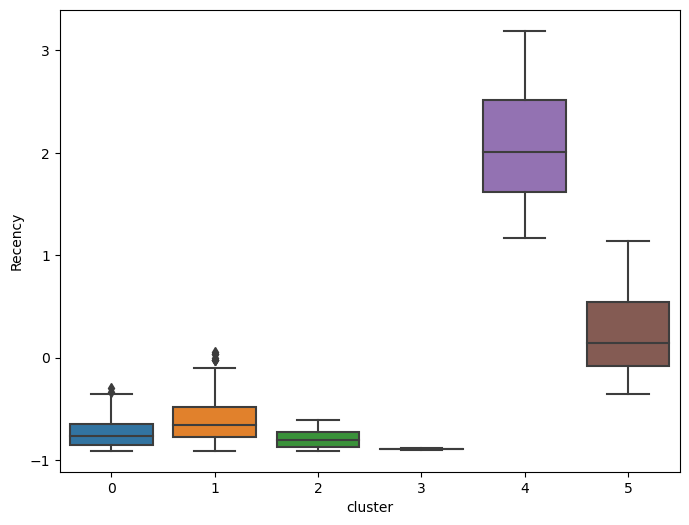

In [234]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster',y='Recency',data=rfm_normalized)

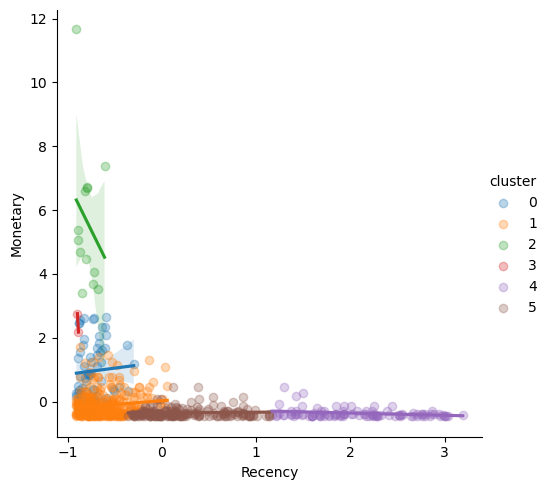

In [235]:
sns.lmplot(data= rfm_normalized,x='Recency',y='Monetary',hue='cluster',scatter_kws={'alpha':0.3})

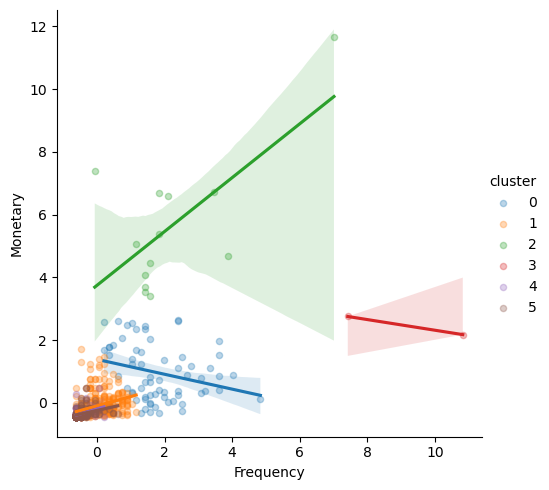

In [236]:
sns.lmplot(data= rfm_normalized,x='Frequency',y='Monetary',hue='cluster',scatter_kws={'s':20,'alpha':0.3})

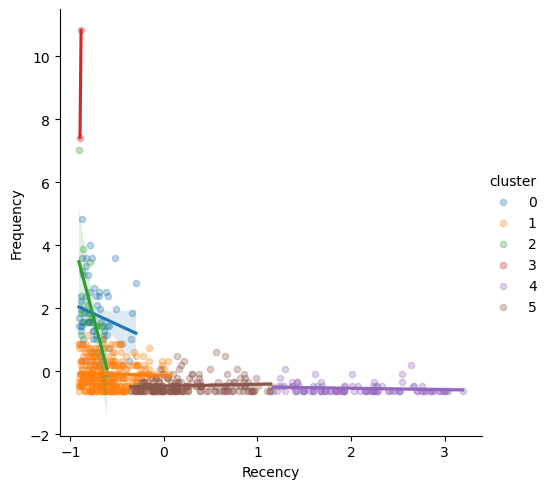

In [237]:
sns.lmplot(data= rfm_normalized,x='Recency',y='Frequency',hue='cluster',scatter_kws={'s':20,'alpha':0.3})

<IPython.core.display.Javascript object>


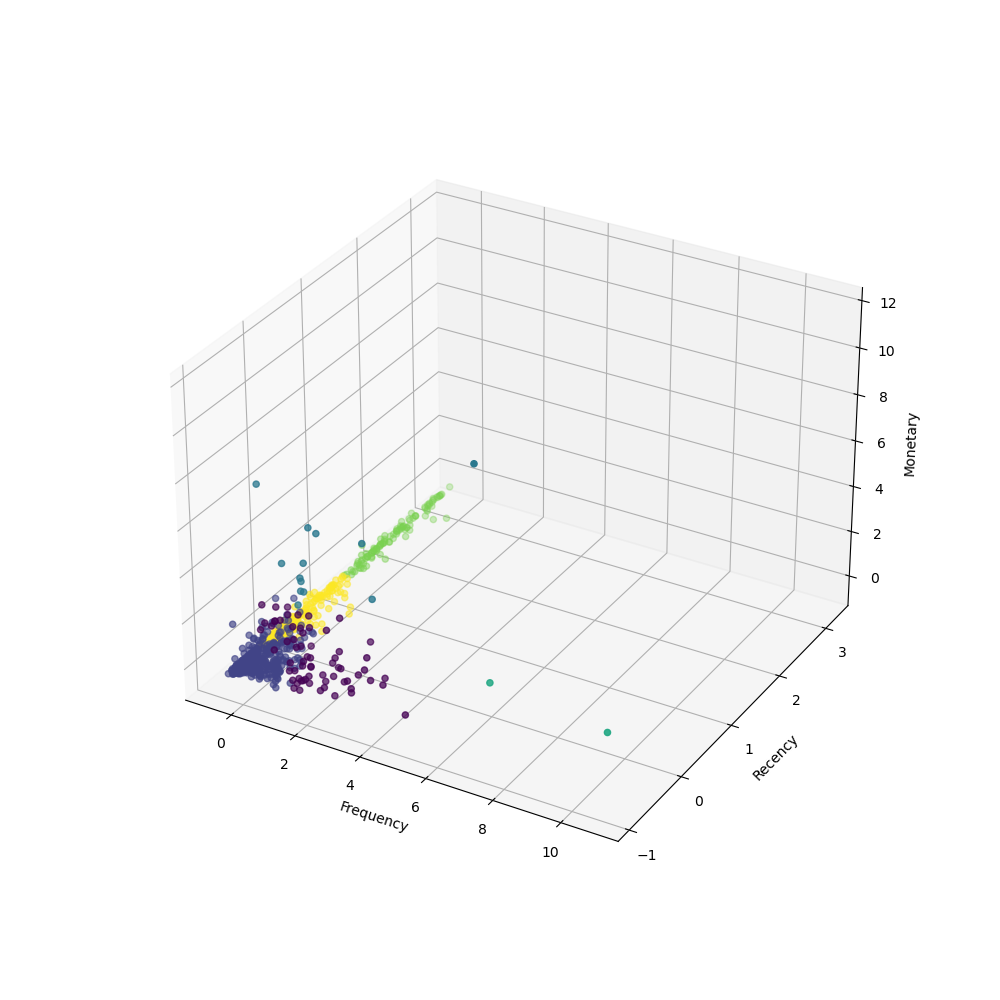

In [238]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
ax = plt.axes(projection ="3d")
xline = rfm_normalized['Frequency']
yline = rfm_normalized['Recency']
zline = rfm_normalized['Monetary']
ax.scatter3D(xline, yline, zline, c=rfm_normalized['cluster'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
plt.show()